In [716]:
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np

In [717]:
q_o, q_c,c, a, b, pi,i, f_k=sp.symbols('q_o q_c c a b pi i f_k')


# c er konstante marginalkostnader, a og b er parametre i etterspørselsfunksjonen som er gitt ved P = a - bQ
# hvor etterspørselen er P = 990-1/60(Q_o+Q_c), faste kostnader for begge bedrifter er 3 millioner
c = 50
a = 990
b = 1/60
f_k = 3000000
def P_demand(Q,a,b):
    return a-b*Q

def profit(q_o,q_c,c,a,b):
    return (P_demand(q_o+q_c,a,b)-c)*q_o

profit(q_o,q_c,c,a,b)

q_o*(-0.0166666666666667*q_c - 0.0166666666666667*q_o + 940)

In [718]:
# Deriverer profittfunksjon til Dr Choice
d_profit2_Q=sp.diff(profit(q_c,q_o,c,a,b),q_c)
d_profit2_Q

-0.0333333333333333*q_c - 0.0166666666666667*q_o + 940

In [719]:
# Setter den deriverte lik 0 og finner reaksjonsfunksjon til Dr choice
Q2_sol1=sp.solve(d_profit2_Q,q_c)[0]
sp.simplify(Q2_sol1)

28200.0 - 0.5*q_o

In [720]:
# På trinn 1 settes reaksjonsfunksjonene til Dr Choice inn i Olivita sin profittfunksjon, og deriverer dette utrykket mhp q_o
d_profit1_Q=sp.diff(profit(q_o,Q2_sol1,c,a,b),q_o)
d_profit1_Q

470.0 - 0.0166666666666667*q_o

In [721]:
# For å finne optimalt kvantum til lederbedriften (Olivita) setter vi uttrykket over lik 0
Q1_sol=sp.solve(d_profit1_Q,q_o)[0]
Q1_sol

28200.0000000000

In [722]:
Q2_sol2=Q2_sol1.subs({q_o:Q1_sol})
sp.simplify(Q2_sol2)

14100.0000000000

In [723]:
def P_demand(q_o,q_c):
    return a-b*(q_o+q_c)
# Optimal pris i sluttmarkedet:
P_opt=P_demand(q_o,q_c).subs({q_o:Q1_sol,q_c:Q2_sol2})
P_opt

285.000000000000

In [724]:
# profitt for lederbedrift (Olivita):
sp.simplify((P_opt-c)*Q1_sol-f_k)

3627000.00000000

In [725]:
# profitt for følgerbedrift (Dr Choice):
sp.simplify((P_opt-c)*Q2_sol2-f_k)

313500.000000000

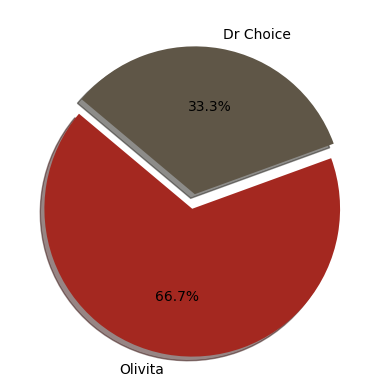

In [726]:
# Lager første pai som viser hvor stor andel av markedet hver bedrift har ved bruk av stackelbergmodellen
labels = 'Olivita', 'Dr Choice'
sizes = [Q1_sol,Q2_sol2]
colors = ['#A42820', '#5F5647']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.savefig('dokumentobjekter/figurer/stackelberg_olivita_dr_choice.png')


In [727]:
# regner cournot likevekt
q1, q2,c1,c2, a, b=sp.symbols('q1 q2 c1 c2 a b')

a = 990
b = 1/60
c = 50
def P_demand(Q,a,b):
    return a-b*Q

def profit(q1,q2,c,a,b):
    return (P_demand(q1+q2,a,b)-c)*q1

In [728]:
d_profit1_Q=sp.diff(profit(q1,q2,c,a,b),q1)
d_profit2_Q=sp.diff(profit(q2,q1,c,a,b),q2)

display(d_profit1_Q)
display(d_profit2_Q)

-0.0333333333333333*q1 - 0.0166666666666667*q2 + 940

-0.0166666666666667*q1 - 0.0333333333333333*q2 + 940

In [729]:
sol=sp.solve([d_profit1_Q,d_profit2_Q],[q1,q2])

Q1_sol =sp.simplify((sol[q1]))
Q1_sol

18800.0000000000

In [730]:
Q2_sol =sp.simplify((sol[q1]))
Q2_sol

18800.0000000000

In [731]:
def P_demand(q1,q2):
    return a-b*(q1+q2)
# Optimal pris i sluttmarkedet:
P_opt=P_demand(q1,q2).subs({q1:sol[q1],q2:sol[q2]})
P_opt

363.333333333333

In [732]:
# profitt for lederbedrift (Olivita):
sp.simplify((P_opt-c)*sol[q1]-f_k)

2890666.66666667

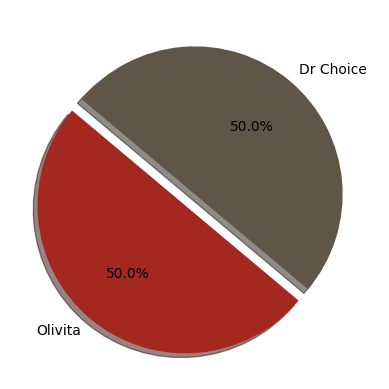

In [733]:
# Lager første pai som viser hvor stor andel av markedet hver bedrift har ved bruk av stackelbergmodellen
sizes = [Q1_sol,Q2_sol]
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('dokumentobjekter/figurer/cournot_olivita_dr_choice.png')


In [734]:
# Starter på oppgave 2, regner på nytt cournot for mikroøl
# q_g er graffi, q_b er bryggeri 13 og q_m er mack mikrobryggeri

# regner cournot likevekt
q_g, q_b, q_m,c_g,c_b,c_m, a, b, f_k,c=sp.symbols('q_g q_b q_m c_g c_b c_m a b f_k c')

a = 175
b = 4
c_g = 10
c_b = 10
c_m = 7
f_k = 300000
def P_demand(Q,a,b):
    return a-b*Q

def profit(q_g,q_b,q_m,c,a,b):
    return (P_demand(q_g+q_b+q_m,a,b)-c)*q_g

In [735]:
profit(q_g,q_b,q_m,c,a,b)

q_g*(-c - 4*q_b - 4*q_g - 4*q_m + 175)

In [736]:
d_profit1_Q=sp.diff(profit(q_g,q_b,q_m,c_g,a,b),q_g)
d_profit2_Q=sp.diff(profit(q_b,q_g, q_m,c_b,a,b),q_b)
d_profit3_Q=sp.diff(profit(q_m,q_g,q_b,c_m,a,b),q_m)


display(d_profit1_Q)
display(d_profit2_Q)
display(d_profit3_Q)

-4*q_b - 8*q_g - 4*q_m + 165

-8*q_b - 4*q_g - 4*q_m + 165

-4*q_b - 4*q_g - 8*q_m + 168

In [737]:
# Tallene blir i tusener

sol=sp.solve([d_profit1_Q,d_profit2_Q,d_profit3_Q],[q_g,q_b,q_m])

# Kvantum til Graff brygghus
display((sol[q_g]))
# Kvantum til Bryggeri 13
display((sol[q_b]))
# Kvantum til Mack mikrobryggeri
display((sol[q_m]))

81/8

81/8

87/8

In [738]:
def P_demand(q_g,q_b,q_m):
    return a-b*(q_g+q_b+q_m)

# Optimal pris i sluttmarkedet:
P_opt=P_demand(q_g,q_b,q_m).subs({q_g:sol[q_g],q_b:sol[q_b],q_m:sol[q_m]})

# simplify.doit
P_opt

101/2

In [739]:
# Husk å gange med 1000 for å finne profitt siden tall er oppgitt i tusen

# profitt for (Graff brygghus):
Graff= sp.simplify((P_opt-c_g)*(sol[q_g]*1000)-f_k)
display(Graff)
# profitt for Bryggeri 13:
Bryggeri_13= sp.simplify((P_opt-c_b)*(sol[q_b]*1000)-f_k)

# profitt for Mack mikrobryggeri:
Mack = sp.simplify((P_opt-c_m)*(sol[q_m]*1000)-f_k)

display(Bryggeri_13)
display(Mack)

#Profitt for bryggeri 13 og mack før fusjon
Mack+Bryggeri_13

220125/2

220125/2

346125/2

283125

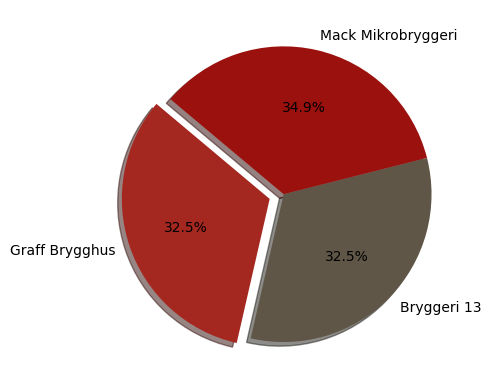

In [740]:
# Oppgave 2 figur for mikrobryggeriene
labels = 'Graff Brygghus', 'Bryggeri 13', 'Mack Mikrobryggeri'
sizes = [sol[q_g],sol[q_b],sol[q_m]]
colors = ['#A42820', '#5F5647', '#9B110E']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.show()

In [741]:
# Fusjonerer to asymmetriske cournot bedrifter Mack mikrobryggeri og Bryggeri 13

# Oppgave 2a
# q_g er kvantum til Graff brygghus
# q_bm blir kvantum til den fusjonerte bedriften
# ny fk for den fusjonerte bedriften blir 500 000

# regner cournot likevekt
q_g, q_bm,c_g,c_bm, a, b, f_k,c, f_k_bm=sp.symbols('q_g q_bm c_g c_bm a b f_k c f_k_bm')

a = 175
b = 4
c_g = 10
c_bm = 7
f_k = 300000
f_k_bm = 500000
def P_demand(Q,a,b):
    return a-b*Q

def profit(q_g,q_bm,c,a,b):
    return (P_demand(q_g+q_bm,a,b)-c)*q_g

In [742]:
d_profit1_Q=sp.diff(profit(q_g,q_bm,c_g,a,b),q_g)
d_profit2_Q=sp.diff(profit(q_bm,q_g,c_bm,a,b),q_bm)


display(d_profit1_Q)
display(d_profit2_Q)

-4*q_bm - 8*q_g + 165

-8*q_bm - 4*q_g + 168

In [743]:
# Kvantum er i tusener

sol=sp.solve([d_profit1_Q,d_profit2_Q],[q_g,q_bm])

# Kvantum til Graff brygghus
display(sol[q_g])
# Kvantum til fusjonert bedrift
display(sol[q_bm])

27/2

57/4

In [744]:
def P_demand(q_g,q_bm):
    return a-b*(q_g+q_bm)

# Optimal pris i sluttmarkedet:
P_opt=P_demand(q_g,q_bm).subs({q_g:sol[q_g],q_bm:sol[q_bm]})

# Optimal sluttpris 
P_opt

64

In [745]:
# profitt for (Graff brygghus):
display(sp.simplify((P_opt-c_g)*(sol[q_g]*1000)-f_k))

# profitt for fusjonert bedrift
display(sp.simplify((P_opt-c_bm)*(sol[q_bm]*1000)-f_k_bm))

429000

312250

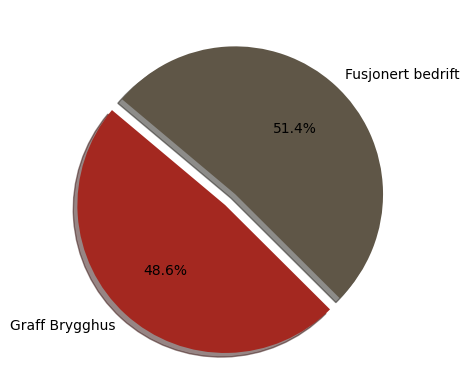

In [746]:
# Figur for markedet etter fusjon

labels = 'Graff Brygghus', 'Fusjonert bedrift'
sizes = [sol[q_g],sol[q_bm]]
colors = ['#A42820', '#5F5647']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.savefig('dokumentobjekter/figurer/fusjonert_bedrift.png')

In [747]:
q1, q2,c, a, b, pi,i=sp.symbols('q1 q2 c a b pi i')

a = 175
b = 4
c = 10


def P_demand(Q,a,b):
    return a-b*Q

def profit(q1,q2,c,a,b):
    return (P_demand(q1+q2,a,b)-c)*q1

In [748]:
d_profit2_Q=sp.diff(profit(q2,q1,c,a,b),q2)
d_profit2_Q

-4*q1 - 8*q2 + 165

In [749]:
# Graff brygghus
Q2_sol1=sp.solve(d_profit2_Q,q2)[0]
Q2_sol1

165/8 - q1/2

In [750]:

d_profit1_Q=sp.diff(profit(q1,Q2_sol1,7,a,b),q1)
d_profit1_Q

171/2 - 4*q1

In [751]:
# Setter den deriverte lik 0 og finner reaksjonsfunksjon til fusjonert bedrift
Q1_sol=sp.solve(d_profit1_Q,q1)[0]
round(Q1_sol)

21

In [752]:
Q2_sol2=Q2_sol1.subs({q1:Q1_sol})
round(Q2_sol2)

10

In [753]:
def P_demand(q1,q2):
    return a-b*(q1+q2)

# Optimal kvantum i sluttmarkedet:
P_opt=P_demand(q1,q2).subs({q1:Q1_sol,q2:Q2_sol2})
round(sp.simplify(P_opt))

50

In [754]:
c_m = 7
# profitt for lederbedrift:
def profitt(q1):
    return (P_opt-7)*(Q1_sol)*1000-500000

mack_profitt = sp.simplify(profitt(q1))

profitt_mack_stackel=round(mack_profitt,2)
profitt_mack_stackel

413781.25

In [755]:
# profitt for følgerbedrift:
def profitt(q2):
    return (P_opt-10)*(Q2_sol2)*1000-300000

svar_2 = sp.simplify(profitt(q2))
graff_profitt = round(svar_2,2)

In [756]:
graff_profitt

95015.62

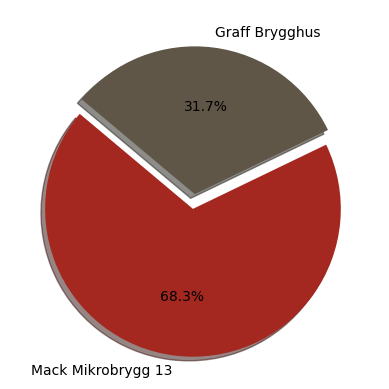

In [757]:
# Lager første pai som viser hvor stor andel av markedet hver bedrift har ved bruk av stackelbergmodellen
labels = ['Mack Mikrobrygg 13', 'Graff Brygghus']
sizes = [Q1_sol,Q2_sol2]
colors = ['#A42820', '#5F5647']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.savefig('dokumentobjekter/figurer/stackelberg_mack_graff.png')

In [758]:
# Markedet etter fusjon med to symmetriske bedrifter under cournot konkurranse

# Oppgave 2b
# q_g er kvantum til Graff brygghus
# q_bm blir kvantum til Mack mikrobrygg 13
# ny fk for den fusjonerte bedriften blir 500 000 samt for Graff brygghus
# c_g = c_bm = 7 siden de er symmetriske og graff har nytt produksjonsutstyr

# regner cournot likevekt
q_g, q_bm, a, b, f_k,c, f_k_bm=sp.symbols('q_g c_bm a b f_k c f_k_bm')

a = 175
# Ny etterspørsel
b = 4
c = 7
f_k = 500000

def P_demand(Q,a,b):
    return a-b*Q


def profit(q_g,q_bm,c,a,b):
    return (P_demand(q_g+q_bm,a,b)-c)*q_g

In [759]:
profit(q_g,q_bm,c,a,b)

q_g*(-4*c_bm - 4*q_g + 168)

In [760]:
d_profit1_Q=sp.diff(profit(q_g,q_bm,c,a,b),q_g)
d_profit2_Q=sp.diff(profit(q_bm,q_g,c,a,b),q_bm)


display(d_profit1_Q)
display(d_profit2_Q)

-4*c_bm - 8*q_g + 168

-8*c_bm - 4*q_g + 168

In [761]:
# Kvantum er i tusener

sol=sp.solve([d_profit1_Q,d_profit2_Q],[q_g,q_bm])

# Kvantum til Graff brygghus
display(sol[q_g])
# Kvantum til fusjonert bedrift
display(sol[q_bm])

14

14

In [762]:
def P_demand(q_g,q_bm):
    return a-b*(q_g+q_bm)

# Optimal pris i sluttmarkedet:
P_opt=P_demand(q_g,q_bm).subs({q_g:sol[q_g],q_bm:sol[q_bm]})

P_opt

63

In [763]:
58/2

29.0

In [764]:
# profitt for (Graff brygghus):
graff_proffittt = sp.simplify((P_opt-c)*(sol[q_g])*1000-f_k)
display(graff_proffittt)
# profitt for fusjonert bedrift
mack_fusjonert_proff = sp.simplify(P_opt-c)*(sol[q_bm]*1000)-f_k
display(mack_fusjonert_proff)

284000

284000

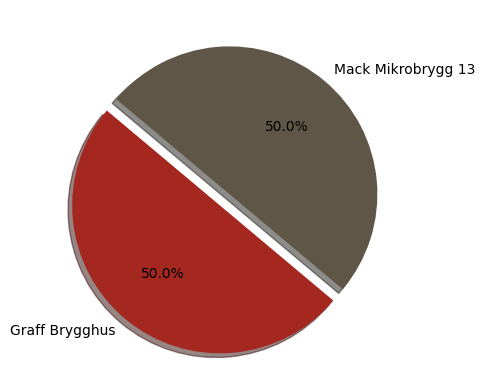

In [765]:
# Figur for markedet før fusjon
labels = 'Graff Brygghus', 'Mack Mikrobrygg 13'
sizes = [sol[q_g],sol[q_bm]]
colors = ['#A42820', '#5F5647']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.savefig('', bbox_inches='tight', dpi=600)

In [766]:
# Oppstrømsbedriftene er bryggeriene
# Nedstrømsbedriften er Restaurant Gruppen Holding (RGH)
# Tilpasning ved monopol for oppstrøm og nedstrømsbedriftene


A, B,Qd,Qr,QI,P,c, r=sp.symbols('A B Qd Qr QI P c r')


A = 175
B = 2
c = 7

def demand(Q):
    return (A-B*Q)

def marginalrevenue(Q):
    return (A-2*B*Q)

In [767]:
Q=sp.symbols('Q', real=True, positive=True)
equ=sp.Eq(marginalrevenue(Q),r)
equ

Eq(175 - 4*Q, r)

In [768]:
Qd_equ=sp.solve(equ,Q)[0]
Qd_equ

175/4 - r/4

In [769]:
P_eq=demand(Qd_equ)
P_eq

r/2 + 175/2

In [770]:

def demand(Qr):
    return (A-2*B*Qr)

def marginalrevenue(Qr):
    return (A-4*B*Qr)

In [771]:
Qr=sp.symbols('Qr', real=True, positive=True)
equ=sp.Eq(marginalrevenue(Qr),c)
equ

Eq(175 - 8*Qr, 7)

In [772]:
Qr_equ=sp.solve(equ,Qr)[0]
Qr_equ

21

In [773]:
# optimal pris fra oppstrømsbedriften
r_eq=demand(Qr_equ)
r_eq

91

In [774]:
# Finner pris ved å sette totalt kvantum og pris fra oppstrømsbedriften inn i etterspørselen til nedstrømsbedriften
P_eq.subs({Qd:Qd_equ,r:r_eq})

133

In [775]:
# Optimal kvantum i sluttmarkedet:
Qd_opt=Qd_equ.subs({r:r_eq})
sp.simplify(Qd_opt)

21

In [776]:
# profitt for oppstrømsbedriften ved monopol og fusjon
def profitt(Qr):
    return (r_eq-c)*(Qr_equ)*1000-1000000

proff_etter_fusj=sp.simplify(profitt(Qr_equ))
proff_etter_fusj

764000

In [780]:
284000*2

568000

In [777]:
    # profitt for nedstrømsbedriften
    def profitt(Qd):
        return (P_eq.subs({Qd:Qd_equ,r:r_eq})-r_eq)*Qd_equ.subs({Qd:Qd_equ,r:r_eq})*1000-600000

    sp.simplify(profitt(Qr_equ))

282000

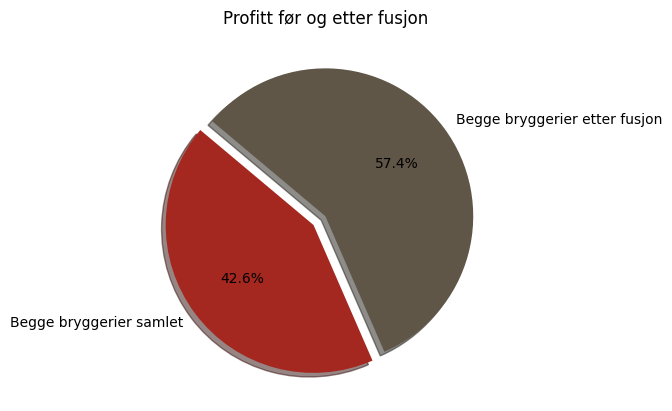

In [778]:
# Lager figur som viser hvor stor profitt som er før og etter fusjon
labels = 'Begge bryggerier samlet', 'Begge bryggerier etter fusjon'
sizes = [graff_proffittt+mack_fusjonert_proff, proff_etter_fusj]
colors = ['#A42820', '#5F5647']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True, startangle=140)
plt.title('Profitt før og etter fusjon')
plt.savefig('dokumentobjekter/figurer/profitt_fusjon.png')